In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from utils.genre_classification import evaluate, executor, feature_preparator
from utils.genre_classification.random_features_slicer import random_features_slicer
from utils.genre_classification.plot_metrics import plot_metrics
from models.genre_classification.FeedForwardSimpleModel import FeedForwardSimpleModel
from utils.genre_classification.plot_confusion_matrix import plot_confusion_matrix

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
BATCH_SIZE = 64
NUM_CLASSES = 8
DEVICE = torch.device('cuda')

In [4]:
%%time
train_data_loader, val_data_loader, test_data_loader, idx_to_label = feature_preparator(
    'features/melgram.p',
    BATCH_SIZE,
    transform=random_features_slicer
)

def transform_idx_to_label(x):
    return idx_to_label[x]

CPU times: user 7.65 s, sys: 3.35 s, total: 11 s
Wall time: 11 s


In [9]:
next(iter(train_data_loader))[0].shape

torch.Size([64, 256, 128])

In [10]:
train_labels = []
val_labels = []
test_labels = []

for x, label in train_data_loader:
    train_labels.append(label)

for x, label in val_data_loader:
    val_labels.append(label)

for x, label in test_data_loader:
    test_labels.append(label)

print('Train', np.unique(torch.cat(train_labels).numpy(), return_counts=True))
print('Val', np.unique(torch.cat(val_labels).numpy(), return_counts=True))
print('Test', np.unique(torch.cat(test_labels).numpy(), return_counts=True))
print(idx_to_label)

Train (array([0, 1, 2, 3, 4, 5, 6, 7]), array([1167, 1178, 1172, 1159, 1171, 1177, 1100, 1156]))
Val (array([0, 1, 2, 3, 4, 5, 6, 7]), array([250, 251, 250, 248, 250, 252, 236, 247]))
Test (array([0, 1, 2, 3, 4, 5, 6, 7]), array([249, 252, 250, 249, 252, 253, 233, 246]))
{0: 'Blues', 1: 'Classical', 2: 'Electronic', 3: 'Folk', 4: 'Hip-Hop', 5: 'Jazz', 6: 'Pop', 7: 'Rock'}


 55%|█████▌    | 55/100 [04:13<03:27,  4.60s/it]

Early stop!


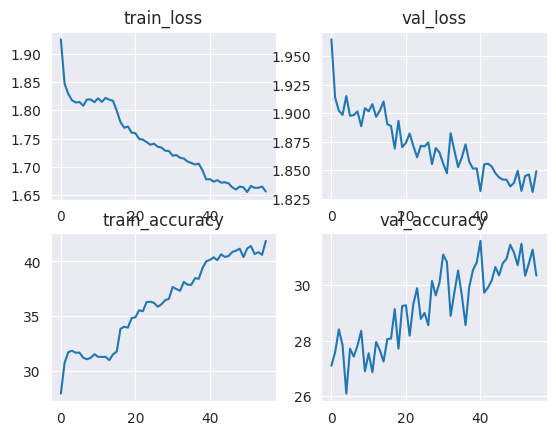

In [6]:
ff_simple_model = FeedForwardSimpleModel(250 * 128, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, ff_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.1, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

In [1]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, ff_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

NameError: name 'evaluate' is not defined

 34%|███▍      | 34/100 [15:55<30:54, 28.09s/it]

Early stop!


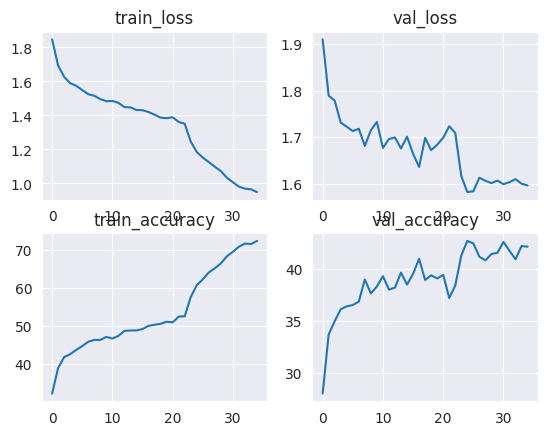

In [15]:
from models.genre_classification.Conv1Model import Conv1Model

conv_1_model = Conv1Model(NUM_CLASSES, time_size=256).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_1_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.53      0.50      0.51       246
   Classical       0.57      0.58      0.57       253
  Electronic       0.26      0.47      0.33       252
        Folk       0.36      0.30      0.33       248
     Hip-Hop       0.73      0.56      0.63       252
        Jazz       0.37      0.25      0.30       252
         Pop       0.29      0.21      0.25       235
        Rock       0.37      0.44      0.40       246

    accuracy                           0.42      1984
   macro avg       0.43      0.41      0.42      1984
weighted avg       0.44      0.42      0.42      1984



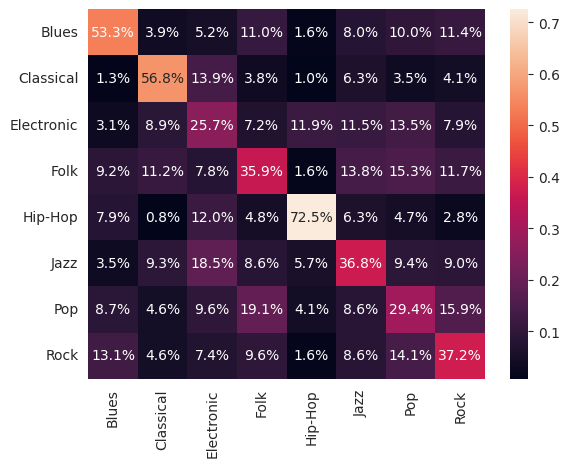

In [16]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_1_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 24%|██▍       | 24/100 [12:14<38:47, 30.62s/it]

Early stop!


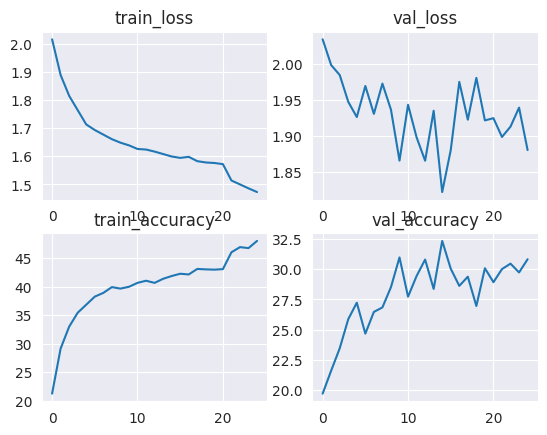

In [19]:
from models.genre_classification.Conv2Model import Conv2Model

conv_2_model = Conv2Model(NUM_CLASSES, 128, 256).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_2_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.66      0.20      0.30       249
   Classical       0.20      0.00      0.01       254
  Electronic       0.31      0.51      0.38       251
        Folk       0.31      0.02      0.03       246
     Hip-Hop       0.75      0.14      0.24       252
        Jazz       0.15      0.03      0.05       252
         Pop       0.25      0.11      0.15       235
        Rock       0.16      0.84      0.27       245

    accuracy                           0.23      1984
   macro avg       0.35      0.23      0.18      1984
weighted avg       0.35      0.23      0.18      1984



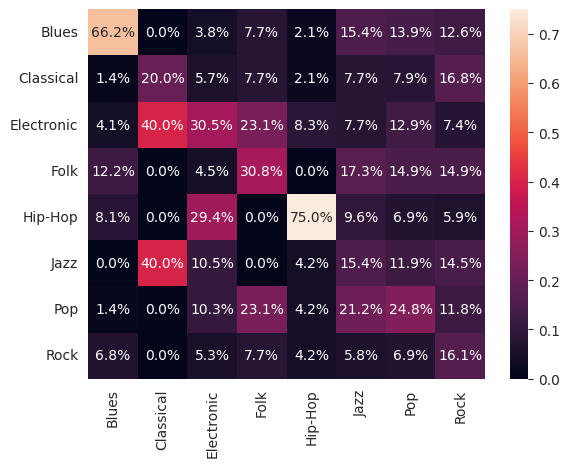

In [20]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_2_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 84%|████████▍ | 84/100 [14:29<02:45, 10.35s/it]

Early stop!


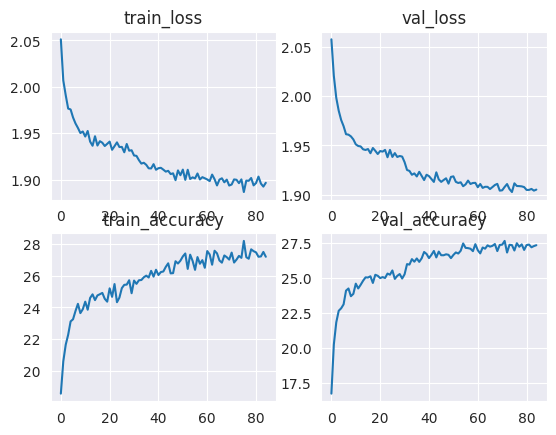

In [21]:
from models.genre_classification.LSTMSimpleModel import LSTMSimpleModel

lstm_simple_model = LSTMSimpleModel(128, 1024, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, lstm_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=1e-4, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.32      0.25      0.28       250
   Classical       0.31      0.70      0.43       253
  Electronic       0.26      0.19      0.22       251
        Folk       0.20      0.18      0.19       246
     Hip-Hop       0.31      0.36      0.33       251
        Jazz       0.17      0.10      0.13       252
         Pop       0.24      0.05      0.08       234
        Rock       0.30      0.40      0.34       247

    accuracy                           0.28      1984
   macro avg       0.26      0.28      0.25      1984
weighted avg       0.26      0.28      0.25      1984



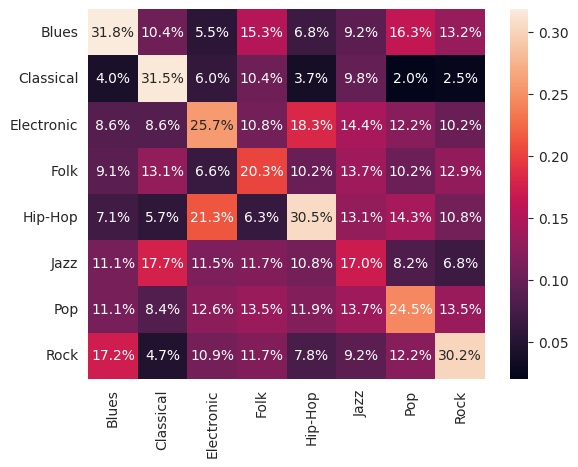

In [22]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, lstm_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 21%|██        | 21/100 [02:38<09:54,  7.52s/it]

Early stop!


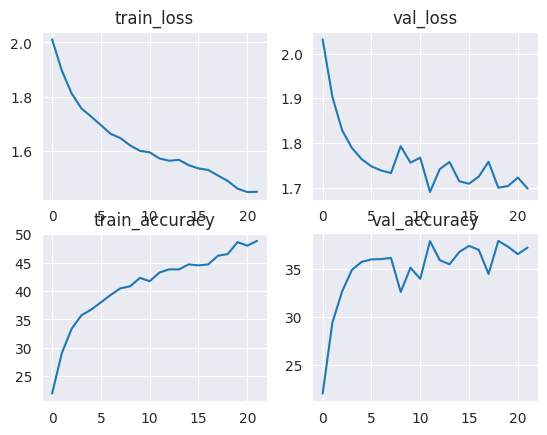

In [30]:
from models.genre_classification.Conv3Model import Conv3Model

conv_3_model = Conv3Model(NUM_CLASSES, 256, 128).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_3_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.30      0.51      0.38       249
   Classical       0.67      0.28      0.39       253
  Electronic       0.45      0.28      0.34       252
        Folk       0.25      0.09      0.13       248
     Hip-Hop       0.77      0.42      0.55       251
        Jazz       0.38      0.05      0.08       251
         Pop       0.21      0.14      0.17       234
        Rock       0.19      0.67      0.29       246

    accuracy                           0.30      1984
   macro avg       0.40      0.30      0.29      1984
weighted avg       0.40      0.30      0.29      1984



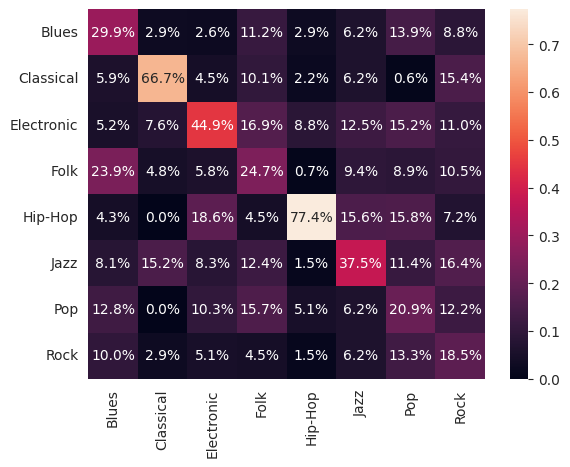

In [31]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_3_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 22%|██▏       | 22/100 [02:55<10:22,  7.98s/it]

Early stop!


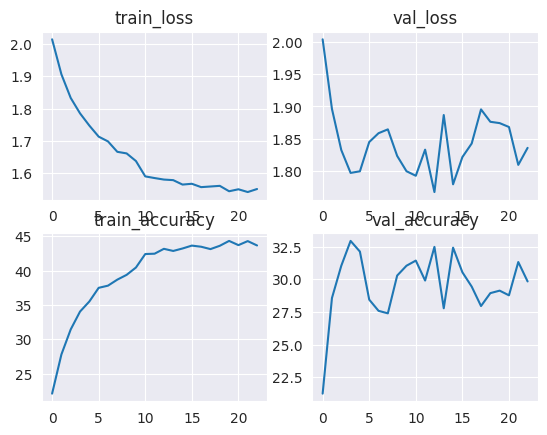

In [32]:
from models.genre_classification.CRNNSimpleModel import CRNNSimpleModel

crnn_model = CRNNSimpleModel(NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, crnn_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

/home/araxal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/araxal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/araxal/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Blues       0.43      0.36      0.39       249
   Classical       0.00      0.00      0.00       252
  Electronic       0.34      0.23      0.28       251
        Folk       0.34      0.10      0.16       248
     Hip-Hop       0.88      0.22      0.35       252
        Jazz       0.00      0.00      0.00       253
         Pop       0.20      0.11      0.14       233
        Rock       0.15      0.83      0.26       246

    accuracy                           0.23      1984
   macro avg       0.29      0.23      0.20      1984
weighted avg       0.29      0.23      0.20      1984



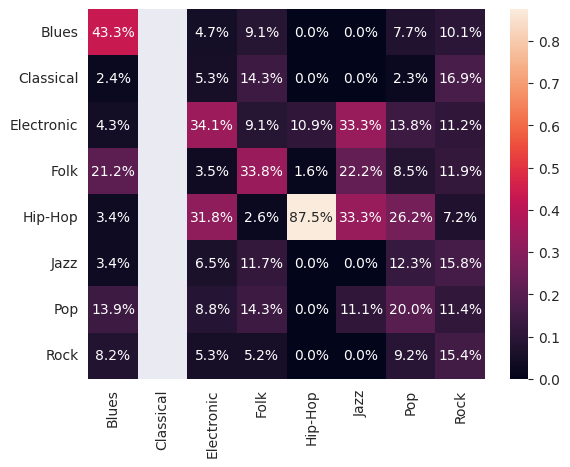

In [34]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, crnn_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

 30%|███       | 30/100 [03:37<08:27,  7.24s/it]

Early stop!


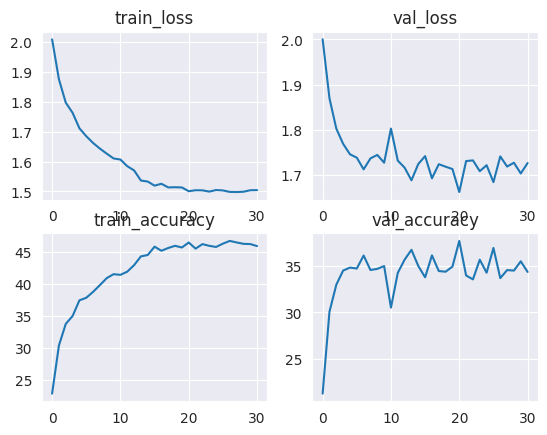

In [36]:
from models.genre_classification.CRNNSimple2Model import CRNNSimple2Model

crnn_model2 = CRNNSimple2Model(NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, crnn_model2, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.60      0.47      0.53       249
   Classical       0.73      0.34      0.47       253
  Electronic       0.32      0.54      0.40       251
        Folk       0.31      0.18      0.23       248
     Hip-Hop       0.73      0.57      0.64       250
        Jazz       0.30      0.20      0.24       251
         Pop       0.20      0.04      0.07       236
        Rock       0.25      0.69      0.36       246

    accuracy                           0.38      1984
   macro avg       0.43      0.38      0.37      1984
weighted avg       0.43      0.38      0.37      1984



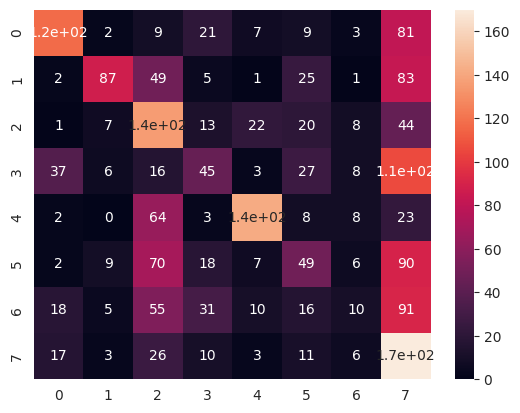

In [30]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, crnn_model2, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

In [48]:
from models.genre_classification.SimpleTransformerModel import TransformerModel

transformer_model = TransformerModel(128, NUM_CLASSES, d_model=1024).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    transformer_model,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=100,
    learning_rate=0.0001,
    weight_decay=0.01,
    evaluate_per_iteration=10,
    early_stop_after=(15,  0.001),
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

  5%|▌         | 5/100 [09:40<3:03:50, 116.11s/it]


KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, transformer_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

In [35]:
import gc
torch.cuda.empty_cache() # PyTorch thing
gc.collect()

19175